### 선형 회귀

이번 시간에는 선형회귀에 대해 설명해 드리도록 하겠습니다.

이번 시간 정리

1. 선형회귀

단순 선형회귀와 다중 선형회귀가 있지만 흔히 사용하는 것은 다중 선형회귀입니다.
Feature가 한 개인 경우가 드물기 때문에 보통 feature가 두 개 이상인 다중 선형회귀를 만들게 됩니다.

2. 비용함수

데이터와 모델 간의 거리를 계산합니다.
비용함수(cost function) 또는 손실함수, 목적함수라 부르기도 합니다.
오차(error)를 계산합니다. (실제 값과 예측값의 차이)
평균 제곱 오차를 최소화하는 파라미터를 찾습니다.

3. 경사하강법

오차를 찾아 나가는 방식
비용함수의 기울기 절대값이 가장 작은 지점을 찾아서 오차가 작은 모델을 만듭니다.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  #평가용

In [2]:
# 데이터 생성
from sklearn.datasets import load_diabetes  # 당뇨병 환자 데이터


def make_dataset():
    dataset = load_diabetes()
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop('target', axis=1), df['target'], test_size=0.2, random_state=1004)
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = make_dataset()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [3]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
152,-0.034575,0.050680,-0.000817,0.070072,0.039710,0.066952,-0.065491,0.108111,0.026717,0.073480
417,-0.052738,-0.044642,0.071397,-0.074527,-0.015328,-0.001314,0.004460,-0.021412,-0.046883,0.003064
172,0.041708,0.050680,0.071397,0.008101,0.038334,0.015909,-0.017629,0.034309,0.073407,0.085907
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
296,0.067136,-0.044642,-0.061174,-0.040099,-0.026336,-0.024487,0.033914,-0.039493,-0.056153,-0.059067


In [4]:
y_train.head()

152    292.0
417     55.0
172    295.0
438    104.0
296     89.0
Name: target, dtype: float64

<Axes: >

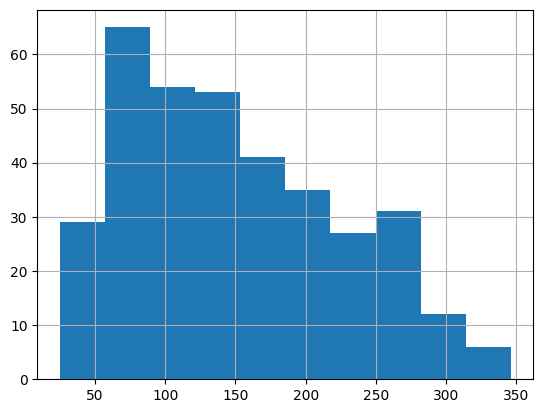

In [5]:
y_train.hist()

### 선형회귀

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

6667.033707865168

### 릿지회귀

1. 릿지 회귀

오버피팅 문제로 규제(regularization)를 적용한 모델
규제 방식: L2 규제
파라미터(alpha) 값을 활용해 조절
alpha 값이 커질수록 회귀 계수 값을 작게 만듦
*규제를 통해서 모델의 성능을 올릴 수 있습니다.



In [7]:
# 릿지 회귀
from sklearn.linear_model import Ridge

model = Ridge(alpha=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

3522.1191842072667

In [8]:
#회귀계수
coef = pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['alpha1'])
coef

,alpha1
age,31.293421
sex,-71.448655
bmi,267.605962
bp,197.362492
s1,14.613257
s2,-13.884237
s3,-124.649836
s4,106.212967
s5,221.068493
s6,101.202546


In [9]:
# 릿지회귀(alpha =10)
model = Ridge(alpha=10)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

5521.884843903384

In [10]:
coef['alpha10'] = model.coef_
coef

,alpha1,alpha10
age,31.293421,16.703166
sex,-71.448655,-1.796418
bmi,267.605962,61.026376
bp,197.362492,47.434846
s1,14.613257,18.491238
s2,-13.884237,13.440104
s3,-124.649836,-35.542087
s4,106.212967,38.896140
s5,221.068493,55.276290
s6,101.202546,35.868345


In [11]:
# 릿지회귀(alpha =0.05)
model = Ridge(alpha=0.05)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

2699.6595785438326

In [12]:
coef['alpha0.05'] = model.coef_
coef

,alpha1,alpha10,alpha0.05
age,31.293421,16.703166,-0.508850
sex,-71.448655,-1.796418,-223.345659
bmi,267.605962,61.026376,469.447848
bp,197.362492,47.434846,348.368885
s1,14.613257,18.491238,-146.952481
s2,-13.884237,13.440104,-18.297550
s3,-124.649836,-35.542087,-141.658486
s4,106.212967,38.896140,115.860926
s5,221.068493,55.276290,432.508101
s6,101.202546,35.868345,69.578796


### 라쏘회귀

1. 라쏘 회귀

오버피팅 문제로 규제(regularization)를 적용한 모델
규제 방식: L1 규제 (중요한 피처만 선택하는 특성)
L2에 비해 회귀 계수를 급격히 감소시켜 중요하다고 생각하는 피처만 선택하고 나머지는 0으로 만듦
[리마인드] 규제 방식 비교

릿지 회귀 : L2 규제 방식
라쏘 회귀 : L1 규제 방식 (중요한 피처만 선택하는 특성)

In [13]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

4179.152642946343

In [14]:
coef = pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['alpha1'])
coef

,alpha1
age,0.000000
sex,-0.000000
bmi,343.589790
bp,46.369923
s1,0.000000
s2,0.000000
s3,-0.000000
s4,0.000000
s5,245.170617
s6,0.000000


In [15]:
model = Lasso(alpha=2)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

6398.637179449031

In [16]:
coef['alpha2'] = model.coef_
coef

,alpha1,alpha2
age,0.000000,0.000000
sex,-0.000000,0.000000
bmi,343.589790,42.963888
bp,46.369923,0.000000
s1,0.000000,0.000000
s2,0.000000,0.000000
s3,-0.000000,-0.000000
s4,0.000000,0.000000
s5,245.170617,0.000000
s6,0.000000,0.000000


In [17]:
model = Lasso(alpha=0.05)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

2703.4583679188177

In [18]:
coef['alpha0.05'] = model.coef_
coef

,alpha1,alpha2,alpha0.05
age,0.000000,0.000000,-0.000000
sex,-0.000000,0.000000,-198.948213
bmi,343.589790,42.963888,487.198584
bp,46.369923,0.000000,340.490360
s1,0.000000,0.000000,-95.576361
s2,0.000000,0.000000,-0.000000
s3,-0.000000,-0.000000,-189.867452
s4,0.000000,0.000000,10.487703
s5,245.170617,0.000000,457.332197
s6,0.000000,0.000000,39.292925


### 엘라스틱넷 회귀
1. 엘라스틱넷 회귀

오버피팅 문제로 규제(regularization)를 적용한 모델
규제 방식: L2 규제와 L1 규제 (중요한 피처만 선택하는 특성) 결합
시간이 상대적으로 오래 걸림
[리마인드] 규제방식 비교

릿지 회귀 : L2 규제 방식
라쏘 회귀 : L1 규제 방식 (중요한 피처만 선택하는 특성)
엘라스틱넷 회귀 : L2+L1 규제 결합 방식

In [19]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

6539.270961171604

In [20]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.0001, l1_ratio=0.6)  # 규제비율
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

2675.6031657225312

### 덤포레스트 & XGBoost

이전 시간에 지도학습(분류) 중 랜덤포레스트 & XGBoost를 다뤄봤는데요.

분류뿐만 아니라 회귀에서도 자주 활용됩니다.
이제 실습을 함께 진행해 보도록 하겠습니다.

이번 시간 정리

[리마인드] 랜덤포레스트 VS XGBoost

1. 랜덤포레스트

여러 개의 의사결정 트리로 구성
앙상블 방법 중 배깅(bagging) 방식
부트스트랩 샘플링 (데이터셋 중복 허용)
최종 다수결 투표

2. XGBoost

트리 앙상블 중 성능이 좋은 알고리즘
eXtreme Gradient Boosting을 줄여서 XGBoost라고 한다.

약한 학습기가 계속해서 업데이트를 하며 좋은 모델을 만들어 간다.


### 랜덤포레스 회귀

In [21]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

3220.1002382022475

### xgboost

In [22]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

4265.475533439266

## 하이퍼 파라미터 튜닝

하이퍼파라미터 튜닝

이번 시간에는 하이퍼파라미터 튜닝을 살펴봅시다.

 그리드 서치와 랜덤 서치를 활용해서 파라미터 값을 찾는 방법을 알려드리도록 하겠습니다.

이번 시간 정리

모델의 성능 향상을 위해 하이퍼파라미터 튜닝을 진행하며
 사이킷런의 model_selection에서 제공하는 GridSearchCV와 RandomizedSearchCV를 이용하여 최적화할 수 있습니다.

1. GridSearchCV

grid search를 통해 최적의 하이퍼파라미터를 찾음 (시간 오래 걸림)

2. RandomizedSearchCV

RandomizedSearchCV 는 GridSearchCV와 달리 랜덤으로 N개의 조합만 탐색함
(시간 내 최적의 하이퍼파라미터 탐색)


In [23]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [24]:
# 하이퍼파라미터
params = {'learning_rate': [0.07, 0.05],
          'max_depth': [3, 5, 7],
          'n_estimators': [100, 200],
          'subsample': [0.9, 0.8, 0.7]
          }

In [25]:
# 데이터셋 로드
def make_dataset2():
    dataset = load_diabetes()
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target
    return df.drop('target', axis=1), df['target']


X, y = make_dataset2()

In [26]:
# GridSearchCV
xgb = XGBRegressor()
grid = GridSearchCV(xgb, params, cv=3, n_jobs=-1)
grid.fit(X, y)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.07, 0.05], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200],
                         'subsample': [0.9, 0.8, 0.7]})

In [27]:
# 최적의 하이퍼파라미터를 찾음
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}

In [28]:
xgb = XGBRegressor(
    learning_rate=0.05,
    max_depth=3,
    n_estimators=100,
    subsample=0.7

)

xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)

mean_squared_error(y_test, pred)

3020.722217577996

In [29]:
# RandomizedSearchCV

xgb = XGBRegressor()
grid = RandomizedSearchCV(xgb, params, cv=3, n_iter=10, n_jobs=-1)  # n_iter: 몇 번 반복할지
grid.fit(X, y)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.07, 0.05],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200],
                                        'subsample': [0.9, 0.8, 0.7]})

In [30]:
# 최적의 하이퍼파라미터를 찾음
grid.best_params_

{'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05}

In [31]:
xgb = XGBRegressor(
    learning_rate=0.05,
    max_depth=3,
    n_estimators=100,
    subsample=0.8

)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
mean_squared_error(y_test, pred)

3154.3336034377185

### 평가 (회귀)
이번 시간에는 회귀 평가 지표에 대해서 같이 한번 살펴보도록 하겠습니다.

평가 지표는 여러 개가 있지만 그중 5개를 살펴보겠습니다.

In [32]:
# MAE
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, pred)

47.63303135218245

In [33]:
# MSE
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, pred)

3154.3336034377185

In [34]:
# RMSE
import numpy as np

np.sqrt(mean_squared_error(y_test, pred))

56.163454340324535

In [36]:
# RMSLE
from sklearn.metrics import mean_squared_log_error

np.sqrt(mean_squared_log_error(y_test, pred))

0.4313809272435647

In [37]:
# R2
from sklearn.metrics import r2_score

r2_score(y_test, pred)

0.5182398701894719